In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams["font.size"] = 16

In [20]:

dir_ls1 = [
    "/home/nakao/AdaptiveFEM/work/work_5000_1/",
    "/home/nakao/AdaptiveFEM/work/work_5000_2/",
    "/home/nakao/AdaptiveFEM/work/work_5000_3/",
    "/home/nakao/AdaptiveFEM/work/work_5000_4/",
    "/home/nakao/AdaptiveFEM/work/work_5000_5/",
    "/home/nakao/AdaptiveFEM/work/work_5000_6/",
    "/home/nakao/AdaptiveFEM/work/work_5000_7/",
    "/home/nakao/AdaptiveFEM/work/work_5000_8/",
    "/home/nakao/AdaptiveFEM/work/work_5000_9/",
    "/home/nakao/AdaptiveFEM/work/work_5000_10/",
    "/home/nakao/AdaptiveFEM/work/work_5000_11/",
    "/home/nakao/AdaptiveFEM/work/work_5000_12/",
    "/home/nakao/AdaptiveFEM/work/work_5000_13/",
    "/home/nakao/AdaptiveFEM/work/work_5000_14/",
]
dir_ls2 = [
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling1/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling2/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling3/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling4/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling5/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling6/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling7/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling8/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling9/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling10/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling11/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling12/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling13/",
    "/home/nakao/AdaptiveFEM/work/work_5000_noscaling14/",
]
dir_ls3 = [
    "/home/nakao/AdaptiveFEM/work/work_2500_1/",
    "/home/nakao/AdaptiveFEM/work/work_2500_2/",
    "/home/nakao/AdaptiveFEM/work/work_2500_3/",
    "/home/nakao/AdaptiveFEM/work/work_2500_4/",
    "/home/nakao/AdaptiveFEM/work/work_2500_5/",
    "/home/nakao/AdaptiveFEM/work/work_2500_6/",
    "/home/nakao/AdaptiveFEM/work/work_2500_7/",
]
dir_ls4 = [
    "/home/nakao/AdaptiveFEM/work/work_2500_noscaling1/",
    "/home/nakao/AdaptiveFEM/work/work_2500_noscaling2/",
    "/home/nakao/AdaptiveFEM/work/work_2500_noscaling3/",
    "/home/nakao/AdaptiveFEM/work/work_2500_noscaling4/",
    "/home/nakao/AdaptiveFEM/work/work_2500_noscaling5/",
    "/home/nakao/AdaptiveFEM/work/work_2500_noscaling6/",
    "/home/nakao/AdaptiveFEM/work/work_2500_noscaling7/",
    "/home/nakao/AdaptiveFEM/work/work_2500_noscaling8/",
    "/home/nakao/AdaptiveFEM/work/work_2500_noscaling9/",
]
label_ls = [
    "initial element size 5km",
    "initial element size 5km no scaling",
    "initial element size 2.5km",
    "initial element size 2.5km no scaling",
]
dir_ls_arr = [dir_ls1, dir_ls2, dir_ls3, dir_ls4]

1.8661124853259276e-15
1.1926231682700153e-15
8.34048852513035e-16
4.099476073467155e-16
2.2204684084317694e-16
1.1975476792162523e-16
6.087690146498842e-17
2.906983636058773e-17
1.462695388462843e-17
7.39904985862526e-18
3.680583997653501e-18
1.8452618879034013e-18
9.214474955315872e-19
-----
1.8510923221700663e-15
1.1555485445610479e-15
8.183489889155936e-16
4.0035410479605356e-16
2.3615676631027175e-16
1.1181296159230092e-16
5.675376581545365e-17
3.1354491396770486e-17
2.44205030150738e-17
1.1365067558653225e-17
3.695699488084463e-18
1.905367038933599e-18
9.308416452585455e-19
-----
9.884296125404229e-16
6.470371880675143e-16
3.627007798266296e-16
1.989912741092369e-16
1.1220746716234312e-16
5.630203608753635e-17
-----
9.887898692224887e-16
6.392897638073041e-16
3.587980773872308e-16
1.9986031837710224e-16
1.267577921354956e-16
5.645847114315578e-17
2.8436036733602394e-17
1.43078723815593e-17
-----


Text(0, 0.5, 'norm of displacement difference')

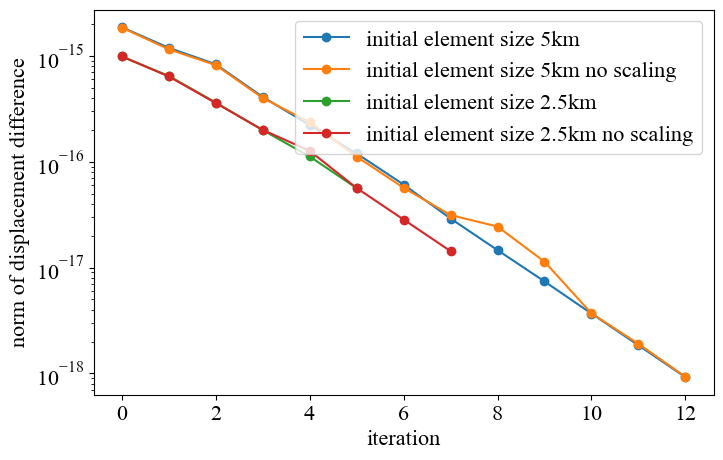

In [28]:
nload = 51
nobs = 1092
fig, ax = plt.subplots(figsize=(8, 5))
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    delta_plt = []
    uobs = np.zeros((nload, nobs*3))
    uobs_prev = np.zeros((nload, nobs*3))

    for iload in range(nload):
        filename = dir_ls[0] + "displacement/" + str(iload + 1).zfill(4) + "_obs.bin"
        uobs_prev[iload] = np.fromfile(filename, dtype=np.float64)
    for i in range(1, len(dir_ls)):
        for iload in range(nload):
            filename = dir_ls[i] + "displacement/" + str(iload + 1).zfill(4) + "_obs.bin"
            uobs[iload] = np.fromfile(filename, dtype=np.float64)
        delta = np.linalg.norm(uobs - uobs_prev)
        print(delta)
        delta_plt.append(delta)
        uobs_prev = uobs.copy()
    ax.plot(delta_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel("iteration")
ax.set_ylabel("norm of displacement difference")

9.393304697814145e-18
7.632276147192122e-18
6.338856229161148e-18
5.434527098783558e-18
4.860558136511473e-18
4.529597232587936e-18
4.350928286928014e-18
4.257930349352071e-18
4.2104667828379604e-18
4.186494918110353e-18
4.174451428312391e-18
4.168412925494783e-18
4.165390516217873e-18
4.1638783622219866e-18
-----
9.393304699850557e-18
7.63267241595597e-18
6.3392654301929926e-18
5.434948972423876e-18
4.860950467757045e-18
4.530097087882635e-18
4.35133382271908e-18
4.258273518440774e-18
4.210772920354715e-18
4.186775732459408e-18
4.174707923092789e-18
4.168657002114587e-18
4.165627526663815e-18
4.164111761790925e-18
-----
7.642107277688634e-18
6.374071652704107e-18
5.493663625679024e-18
4.936419428275412e-18
4.615066425207811e-18
4.4413708148974506e-18
4.350976963099664e-18
-----
7.642107462897153e-18
6.374062313422148e-18
5.4935348972715045e-18
4.936256965117684e-18
4.6148785340523586e-18
4.441215956761375e-18
4.350788631699633e-18
4.304689733534933e-18
4.2814094333173845e-18
-----


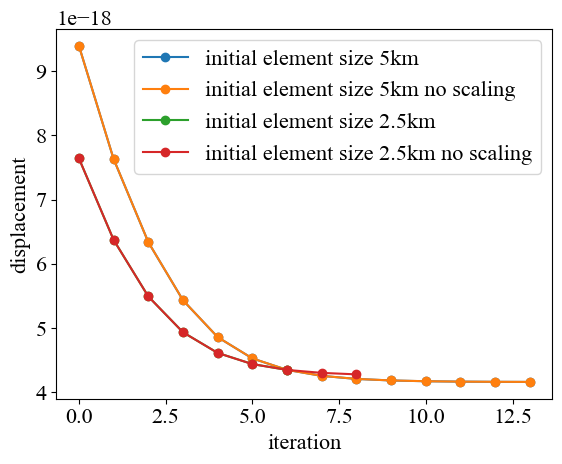

In [19]:
uindex = 200
fig, ax = plt.subplots()
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    uobs_plt = []
    for dir in dir_ls:
        filename = dir + "displacement/0001_obs.bin"
        uobs = np.fromfile(filename, dtype=np.float64)
        uobs_plt.append(uobs[uindex])
        print(uobs[uindex])
    ax.plot(uobs_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.set_xlabel("iteration")
ax.set_ylabel("displacement")
ax.legend()

536701
571258
682150
745871
933669
1446506
2374067
3490294
4117524
4647502
6632353
7277146
9216586
10312614
-----
536701
544447
554331
565347
574893
589395
598295
606702
616272
626212
639707
646722
658817
670241
-----
4091291
4136694
4245516
4536961
4612998
5209070
5516055
-----
4091291
4103917
4119373
4129055
4139201
4154405
4164874
4175895
4184903
-----


Text(0, 0.5, 'number of nodes')

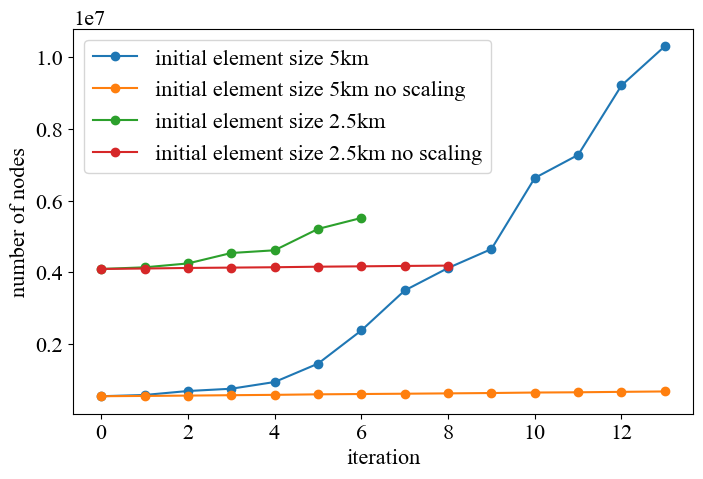

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    nnode_plt = []
    for dir in dir_ls:
        filename = dir + "data/setting.dat"
        with open(filename, "r") as f:
            f.readline()
            nnode = int(f.readline())
            print(nnode)
            nnode_plt.append(nnode) 
    ax.plot(nnode_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.legend(loc='best')
ax.set_xlabel("iteration")
ax.set_ylabel("number of nodes")